# Import Libraries

In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import category_encoders as ce

# Load Dataset

In [2]:
#Load Dataset
fraud_train = pd.read_csv("D:\\data scientist\\CREDIT CARD FRAUD DETECTION\\fraudTrain.csv")
fraud_test = pd.read_csv("D:\\data scientist\\CREDIT CARD FRAUD DETECTION\\fraudTest.csv")

# Display the first few rows of the training dataset
fraud_train.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


# Explore Dataset

In [3]:
#Explore Dataset
fraud_train.info()
fraud_train.describe()
fraud_train['is_fraud'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

is_fraud
0    1289169
1       7506
Name: count, dtype: int64

# Data Visualization

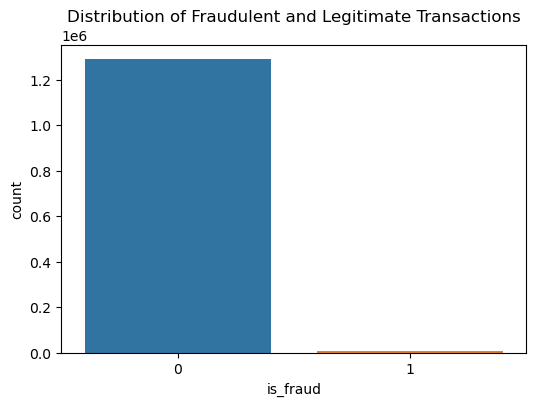

In [4]:
# Plot the distribution of the target variable
plt.figure(figsize=(6, 4))
sns.countplot(x='is_fraud', data=fraud_train)
plt.title('Distribution of Fraudulent and Legitimate Transactions')
plt.show()

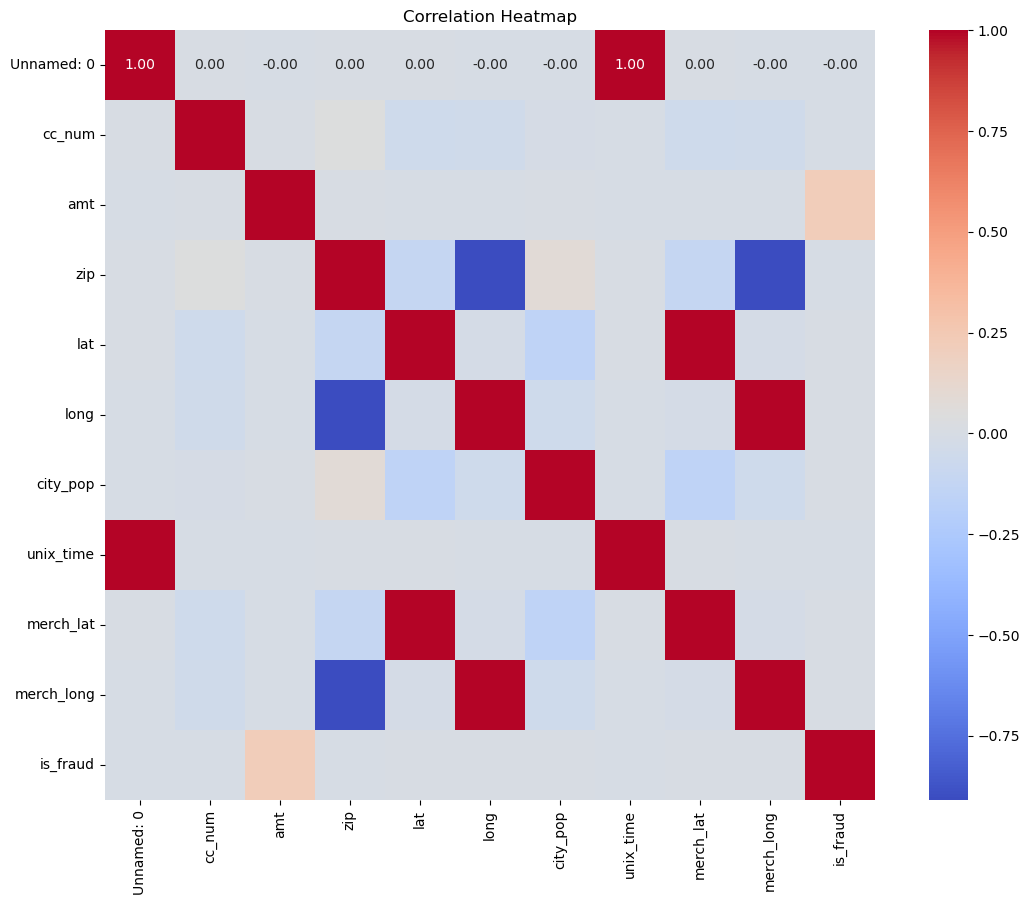

In [5]:
# Plot correlation heatmap for numeric features
plt.figure(figsize=(14, 10))
numeric_features = fraud_train.select_dtypes(include=[np.number])
correlation_matrix = numeric_features.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.show()

C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


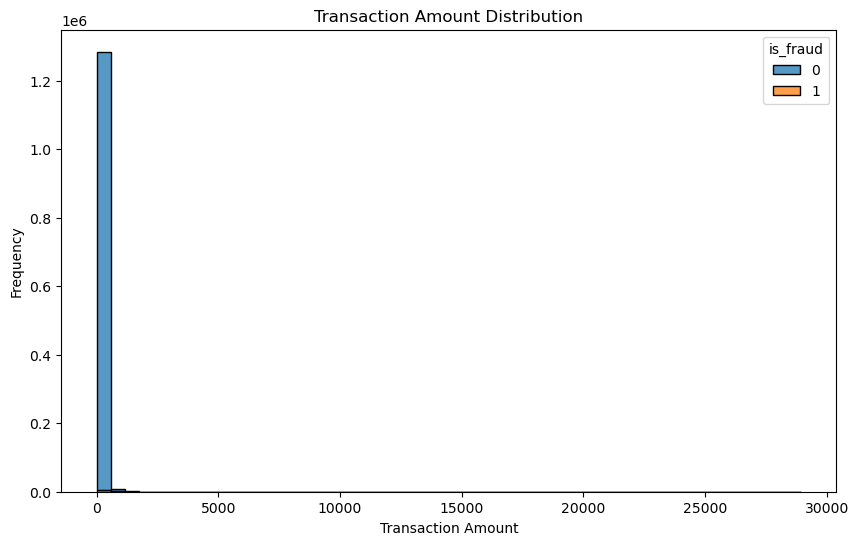

In [6]:
# Visualize transaction amount distribution for fraud and non-fraud cases
plt.figure(figsize=(10, 6))
sns.histplot(data=fraud_train, x='amt', hue='is_fraud', multiple='stack', bins=50)
plt.title('Transaction Amount Distribution')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()

# Preprocess the data

In [7]:
# Identify categorical columns
categorical_cols = fraud_train.select_dtypes(include=['object']).columns

In [8]:
# Check the number of unique values in each categorical column
unique_values = fraud_train[categorical_cols].nunique()

In [9]:
# Define high cardinality and low cardinality columns
high_cardinality_cols = unique_values[unique_values > 10].index.tolist()
low_cardinality_cols = unique_values[unique_values <= 10].index.tolist()

In [11]:
# Apply target encoding to high cardinality columns
target_encoder = ce.TargetEncoder(cols=high_cardinality_cols)
fraud_train = target_encoder.fit_transform(fraud_train, fraud_train['is_fraud'])
fraud_test = target_encoder.transform(fraud_test)

In [12]:
# Apply one-hot encoding to low cardinality columns
fraud_train = pd.get_dummies(fraud_train, columns=low_cardinality_cols, drop_first=True)
fraud_test = pd.get_dummies(fraud_test, columns=low_cardinality_cols, drop_first=True)

In [13]:
# Ensure the train and test datasets have the same columns
fraud_test = fraud_test.reindex(columns=fraud_train.columns, fill_value=0)


In [14]:
# Separate features and target
X_train = fraud_train.drop('is_fraud', axis=1)
y_train = fraud_train['is_fraud']
X_test = fraud_test.drop('is_fraud', axis=1)
y_test = fraud_test['is_fraud']


# Feature Selection and Scaling

In [15]:

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Logistic Regression Model

In [16]:
#Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)

LogisticRegression()

In [17]:
# Predict on test data
y_pred_log_reg = log_reg.predict(X_test_scaled)

In [18]:
# Evaluate the model
print("Logistic Regression Results")
print(confusion_matrix(y_test, y_pred_log_reg))
print(classification_report(y_test, y_pred_log_reg))
print("Accuracy:", accuracy_score(y_test, y_pred_log_reg))

Logistic Regression Results
[[553574      0]
 [  2145      0]]


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.00      0.00      0.00      2145

    accuracy                           1.00    555719
   macro avg       0.50      0.50      0.50    555719
weighted avg       0.99      1.00      0.99    555719

Accuracy: 0.9961401355721147


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Train Decision Tree Model

In [19]:
#Train Decision Tree Model
dec_tree = DecisionTreeClassifier()
dec_tree.fit(X_train_scaled, y_train)

DecisionTreeClassifier()

In [20]:
# Predict on test data
y_pred_dec_tree = dec_tree.predict(X_test_scaled)


In [21]:
# Evaluate the model
print("Decision Tree Results")
print(confusion_matrix(y_test, y_pred_dec_tree))
print(classification_report(y_test, y_pred_dec_tree))
print("Accuracy:", accuracy_score(y_test, y_pred_dec_tree))

Decision Tree Results
[[553574      0]
 [  2145      0]]


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.00      0.00      0.00      2145

    accuracy                           1.00    555719
   macro avg       0.50      0.50      0.50    555719
weighted avg       0.99      1.00      0.99    555719

Accuracy: 0.9961401355721147


# Train Random Forest Model

In [22]:
#Train Random Forest Model
rand_forest = RandomForestClassifier()
rand_forest.fit(X_train_scaled, y_train)


RandomForestClassifier()

In [23]:
# Predict on test data
y_pred_rand_forest = rand_forest.predict(X_test_scaled)

In [24]:
# Evaluate the model
print("Random Forest Results")
print(confusion_matrix(y_test, y_pred_rand_forest))
print(classification_report(y_test, y_pred_rand_forest))
print("Accuracy:", accuracy_score(y_test, y_pred_rand_forest))

Random Forest Results
[[553574      0]
 [  2145      0]]


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.00      0.00      0.00      2145

    accuracy                           1.00    555719
   macro avg       0.50      0.50      0.50    555719
weighted avg       0.99      1.00      0.99    555719

Accuracy: 0.9961401355721147


# Compare Model Performance

C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


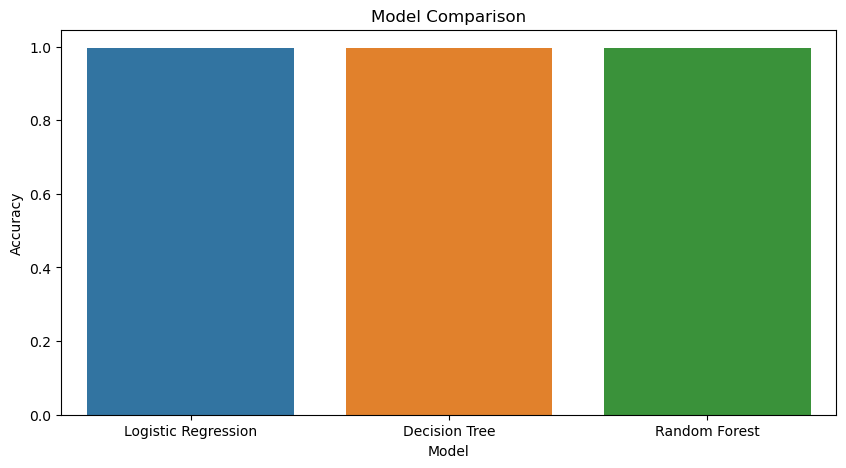

In [26]:
#Compare Model Performance
models = ['Logistic Regression', 'Decision Tree', 'Random Forest']
accuracies = [accuracy_score(y_test, y_pred_log_reg), accuracy_score(y_test, y_pred_dec_tree), accuracy_score(y_test, y_pred_rand_forest)]

plt.figure(figsize=(10, 5))
sns.barplot(x=models, y=accuracies)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Comparison')
plt.show()